In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from main.utils import load_experiment, load_experiments

%reload_ext autoreload
%autoreload 2

In [21]:
plt.style.use('seaborn-v0_8-paper')
plt.style.use('seaborn-v0_8')

In [36]:
# naming of methods
method_names = {
    'badge': 'BADGE',
    'random': 'Random',
    'entropy': 'Entropy',
    'bald': 'BALD',
    'max_logdet_S': 'LogDet(S)',
}

## small dataset

In [53]:
dataset = 'fashion_mnist'
random_ids = [f'random_{dataset}_20_to_200_B=20_' + str(1+i) for i in range(3)]
entropy_ids = [f'entropy_{dataset}_20_to_200_B=20_' + str(1+i) for i in range(3)]
bald_ids = [f'bald_{dataset}_20_to_200_B=20_' + str(1+i) for i in range(3)]
max_logdet_S_ids = [f'max_logdet_S_{dataset}_20_to_200_B=20_' + str(1+i) for i in range(3)]
badge_ids = [f'badge_{dataset}_20_to_200_B=20_' + str(1+i) for i in range(3)]

id_list = [random_ids, entropy_ids, bald_ids, badge_ids, max_logdet_S_ids]

Text(0.5, 1.0, 'small-Fashion-MNIST')

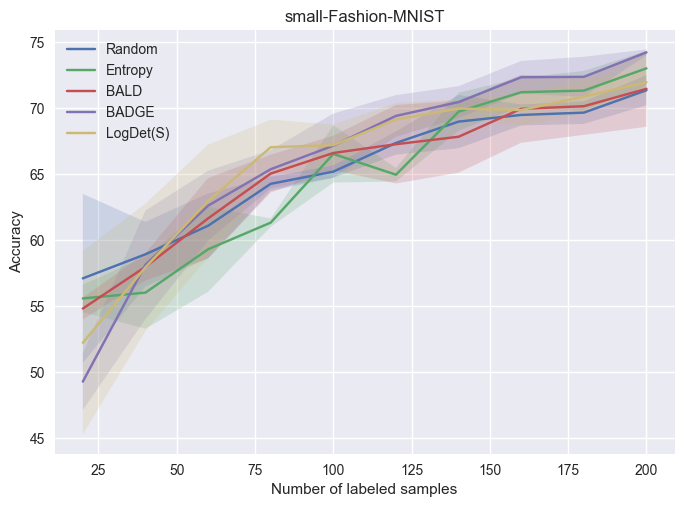

In [55]:
for method in id_list:
    results = load_experiments(method)
    accuracies = np.array([result[1]['test_accs'] for result in results])
    batch_sizes = np.linspace(20, 200, accuracies.shape[1])
    std = np.std(accuracies, axis=0)
    mean = np.mean(accuracies, axis=0)
    plt.plot(batch_sizes, mean, label=method_names[results[0][0].al_method])
    plt.fill_between(batch_sizes, mean - std, mean + std, alpha=0.2, label='_nolegend_')

plt.legend()
plt.xlabel('Number of labeled samples')
plt.ylabel('Accuracy')
plt.title('small-Fashion-MNIST')